In [1]:
import JupyterImport


In [2]:
from FCT import *

importing Jupyter notebook from FCT.ipynb


In [3]:
from shortTh import *

importing Jupyter notebook from shortTh.ipynb


In [4]:
from delay import *

importing Jupyter notebook from delay.ipynb


In [5]:
from QueueLen import *

importing Jupyter notebook from QueueLen.ipynb


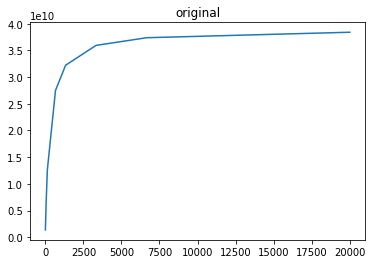

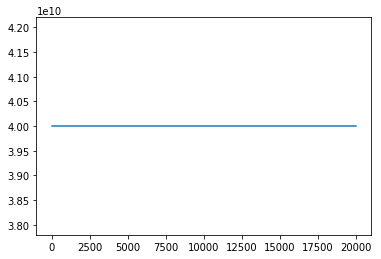

In [6]:
flow_size=[0, 6, 13, 19, 33, 53, 133, 667, 1333, 3333, 6667, 20000, float('inf')]
normalize_lists = loadNormalizeList('/home/pg_ga/lining/Gearbox/automatic/flowBenchmark/', flow_size[1:-1])
plt.plot(normalize_lists[0], normalize_lists[1])
plt.title("original")
plt.show()


original_lists=[flow_size[1:-1],[40 * 1e9 for i in range(len(flow_size) - 2)]]
plt.plot(original_lists[0], original_lists[1])



In [8]:
FCT_analysis_normalize = FCT("/home/pg_ga/lining/Gearbox/automatic/BDP/20200505_8/", \
                   "Topology-incast-singlenode-large-number-8.tcl",\
                   200, \
                   [.1, .2, .3, .4, .5, .6, .7, .8, .9, .95], \
                   ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"],\
                   normalize_lists)
FCT_analysis_original = FCT("/home/pg_ga/lining/Gearbox/automatic/BDP/20200505_8/", \
                   "Topology-incast-singlenode-large-number-8.tcl",\
                   200, \
                   [.1, .2, .3, .4, .5, .6, .7, .8, .9, .95], \
                   ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"],\
                   original_lists)

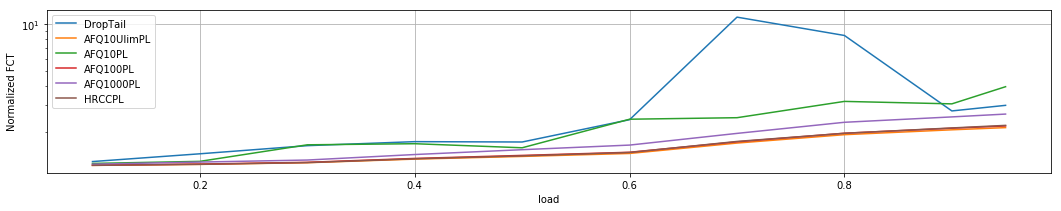

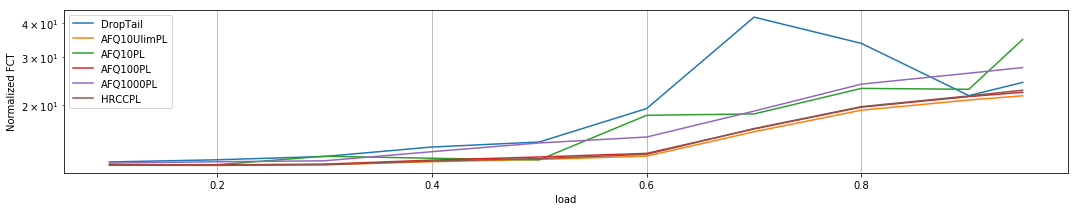

In [9]:
FCT_analysis_normalize.plotting_mean_FCT()
FCT_analysis_original.plotting_mean_FCT()

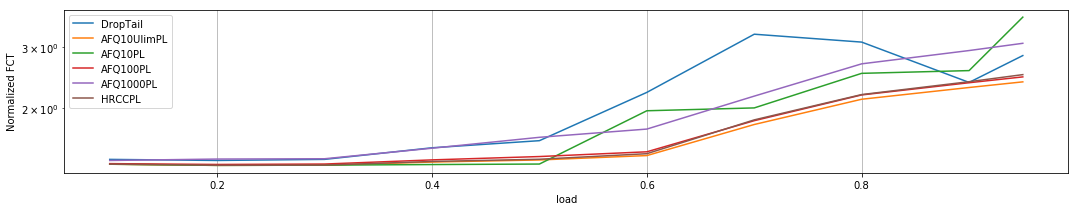

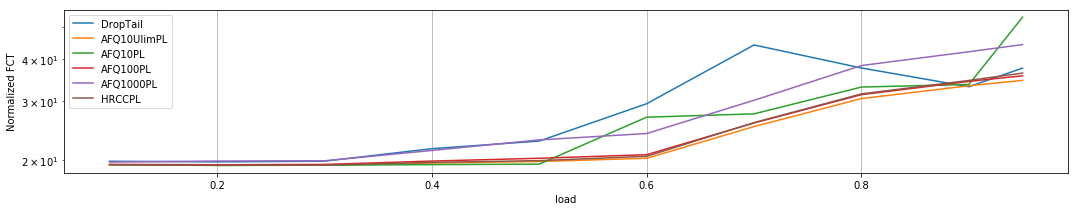

In [27]:
FCT_analysis_normalize.plot_FCT_load(["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"], \
                                 [.1, .2, .3, .4, .5, .6, .7, .8, .9, .95], 80)
FCT_analysis_original.plot_FCT_load(["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"], \
                                 [.1, .2, .3, .4, .5, .6, .7, .8, .9, .95], 80)

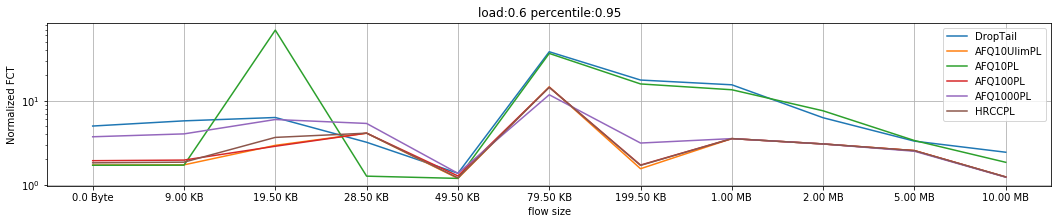

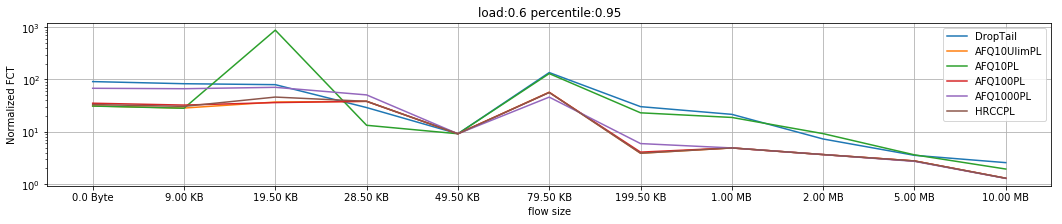

In [22]:
FCT_analysis_normalize.plot_FCT_percentile_fix_load(\
                ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"],\
                .6,\
                .95,\
                flow_size)
FCT_analysis_original.plot_FCT_percentile_fix_load(\
                ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"],\
                .6,\
                .95,\
                flow_size)

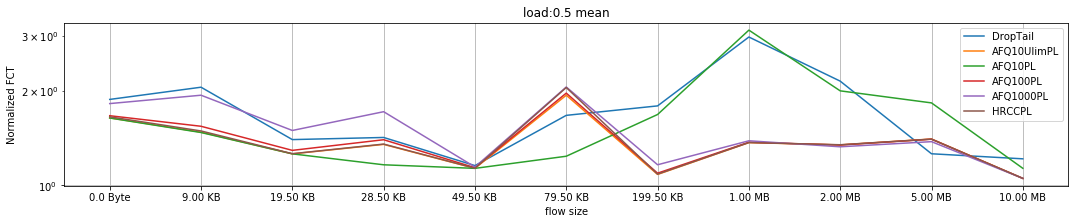

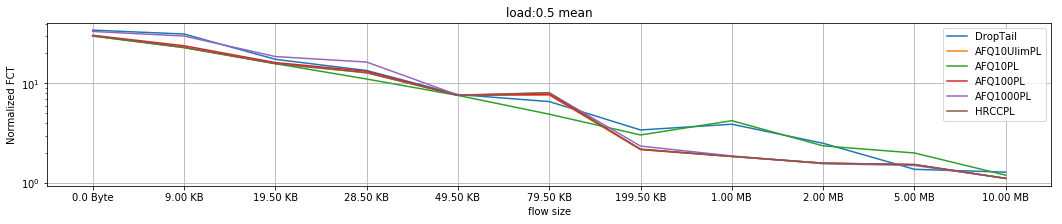

In [20]:
FCT_analysis_normalize.plot_Mean_FCT_fix_load(
    ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"], 0.5, flow_size)

FCT_analysis_original.plot_Mean_FCT_fix_load(
    ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"], 0.5, flow_size)



## DropTail

In [8]:
## comsume too much time
# if __name__ == '__main__':
#     df_out_tr_6 = read_out_tr("/home/ovs2/lining/Gearbox/automatic/", \
#                               "DropTail_flow_200_0.9_Topology-incast-singlenode-large-number-8.tcl_out.tr")
#     plot_short_th(df_out_tr_6, 12, 83)

In [29]:
df_out_tr_6 = read_out_tr("/home/pg_ga/lining/Gearbox/automatic/BDP/20200505_8/", \
                              "DropTail_flow_200_0.6_Topology-incast-singlenode-large-number-8.tcl_out.tr")
df = df_out_tr_6
df_out = df.loc[df["events"].isin(["r"])]
df_out = df_out.loc[df_out["pkt_type"].isin(["tcp"])]
#df_out = df_out.loc[df_out["fid"].isin([180])]
df_out = df_out.loc[df_out["to_node"].isin([83])]
df_out = df_out[['time', 'pkt_size', 'fid']]
r_event_in_dst = df_out
r_event_in_dst['ts'] = r_event_in_dst['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
grouped=r_event_in_dst.groupby('fid')
shortTh = grouped[['ts', 'pkt_size']].resample(str(12) + 'U', on='ts').sum()

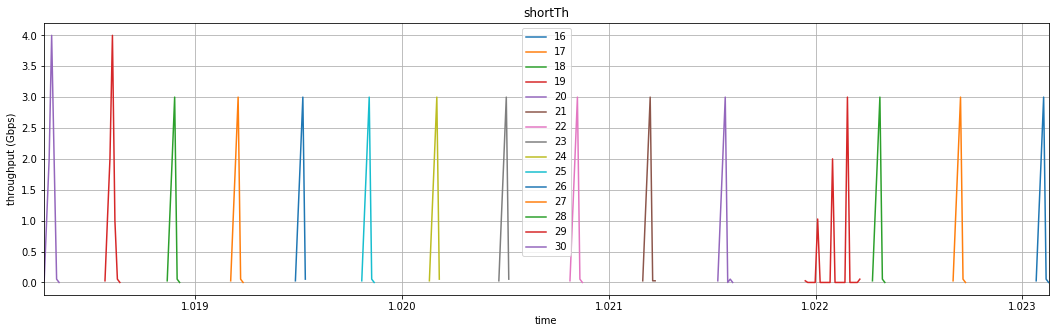

In [30]:
shortTh['throughtput'] = shortTh['pkt_size']*8 / (12 * 1e-6) / 1000 / 1000 / 1000
res = shortTh[['throughtput']]
ax=None
cnt = 0
fids=[]
for fid, _ in grouped:
    res_fid = res.loc[fid]
    res_fid['time'] = res_fid.index / timedelta(seconds=1)
    ax=res_fid.plot(x='time', y='throughtput', ax=ax, figsize=(18,5), kind='line', legend=True, title='shortTh', grid=True)
    fids.append(fid)
    cnt += 1
    if cnt == 15:
        break
plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.legend(fids)
plt.show()

In [31]:
df = df_out_tr_6
df_out = df.loc[df["pkt_type"].isin(["tcp"])]
df_out = df_out.loc[df_out["fid"].isin([180])]
display(df_out.head(20))
print("from", df_out.from_node.unique())
print("to", df_out.to_node.unique())

,events,time,from_node,to_node,pkt_type,pkt_size,flags,fid,src_addr,dst_addr,seq_num,pkt_id
2147304,+,1.084329,35,13,tcp,40,C--A---,180,35.7,83.92,0,122020
2147305,-,1.084329,35,13,tcp,40,C--A---,180,35.7,83.92,0,122020
2147306,r,1.084330,35,13,tcp,40,C--A---,180,35.7,83.92,0,122020
2147307,+,1.084330,13,0,tcp,40,C--A---,180,35.7,83.92,0,122020
2147308,-,1.084330,13,0,tcp,40,C--A---,180,35.7,83.92,0,122020
2147309,r,1.084331,13,0,tcp,40,C--A---,180,35.7,83.92,0,122020
2147310,+,1.084331,0,8,tcp,40,C--A---,180,35.7,83.92,0,122020
2147311,-,1.084331,0,8,tcp,40,C--A---,180,35.7,83.92,0,122020
2147312,r,1.084332,0,8,tcp,40,C--A---,180,35.7,83.92,0,122020
2147313,+,1.084332,8,6,tcp,40,C--A---,180,35.7,83.92,0,122020


from [35 13  0  8  6 19]
to [13  0  8  6 19 83]


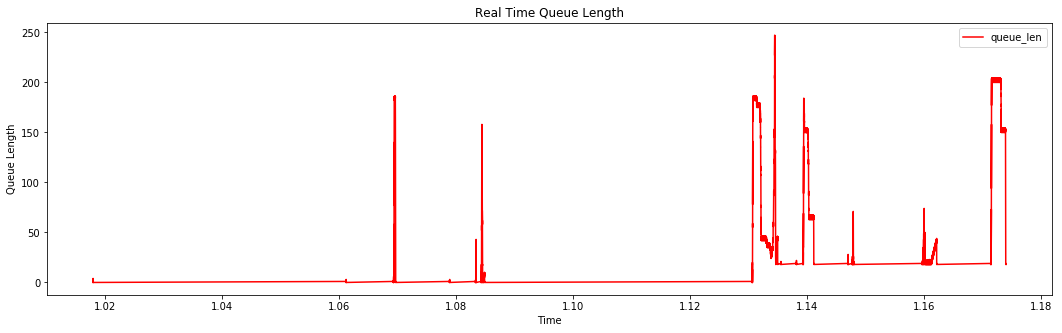

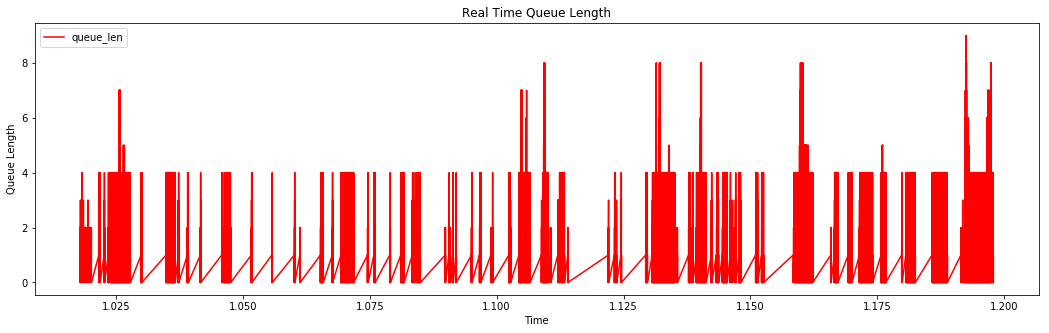

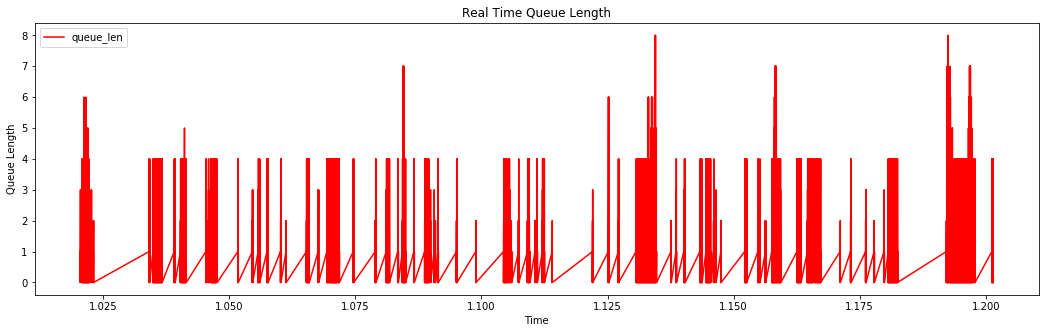

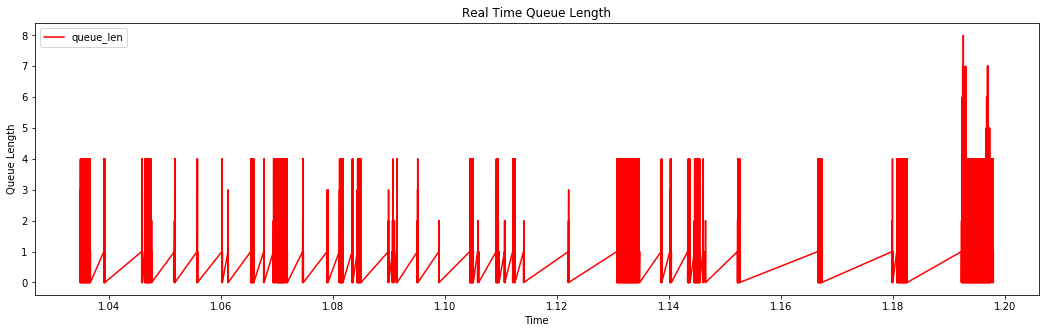

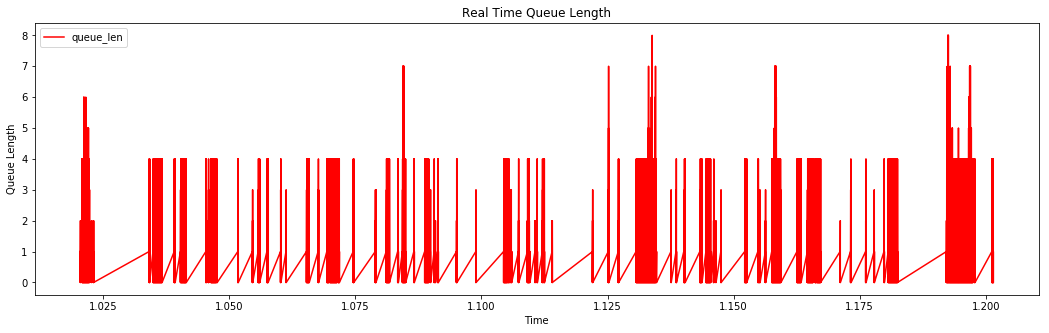

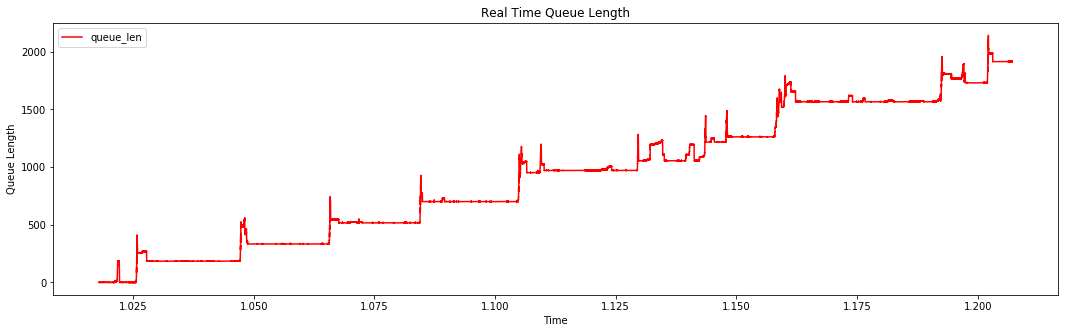

In [32]:
for switch in df_out.from_node.unique():
    cal_queue_len(df_out_tr_6, switch)

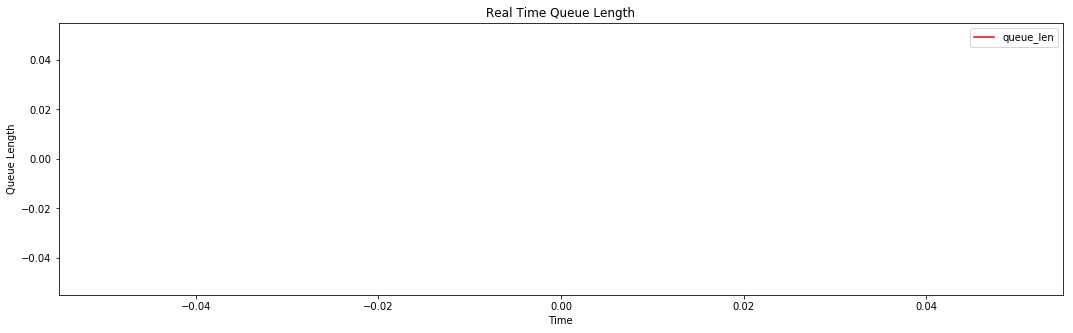

In [33]:
cal_queue_len(df_out_tr_6, 83)

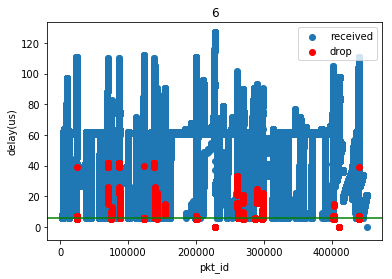

In [34]:
Delay_6 = DelayAnalysis("/home/pg_ga/lining/Gearbox/automatic/BDP/20200505_8/", \
                        "DropTail_flow_200_0.6_Topology-incast-singlenode-large-number-8.tcl_out.tr")
Delay_6.print_pkt_delay(12, '6')

## AFQ10PL

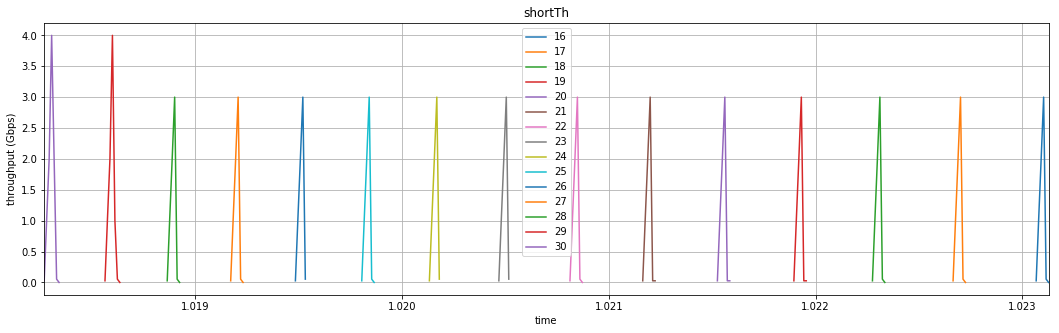

In [35]:
df_out_tr_6 = read_out_tr("/home/pg_ga/lining/Gearbox/automatic/BDP/20200505_8/", \
                              "AFQ10PL_flow_200_0.6_Topology-incast-singlenode-large-number-8.tcl_out.tr")
df = df_out_tr_6
df_out = df.loc[df["events"].isin(["r"])]
df_out = df_out.loc[df_out["pkt_type"].isin(["tcp"])]
df_out = df_out.loc[df_out["to_node"].isin([83])]
df_out = df_out[['time', 'pkt_size', 'fid']]
r_event_in_dst = df_out
r_event_in_dst['ts'] = r_event_in_dst['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
grouped=r_event_in_dst.groupby('fid')
shortTh = grouped[['ts', 'pkt_size']].resample(str(12) + 'U', on='ts').sum()
shortTh['throughtput'] = shortTh['pkt_size']*8 / (12 * 1e-6) / 1000 / 1000 / 1000
res = shortTh[['throughtput']]
ax=None
cnt = 0
fids=[]
for fid, _ in grouped:
    res_fid = res.loc[fid]
    res_fid['time'] = res_fid.index / timedelta(seconds=1)
    ax=res_fid.plot(x='time', y='throughtput', ax=ax, figsize=(18,5), kind='line', legend=True, title='shortTh', grid=True)
    fids.append(fid)
    cnt += 1
    if cnt == 15:
        break
plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.legend(fids)
plt.show()

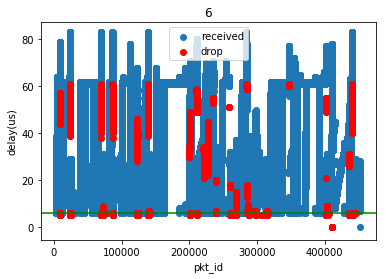

In [36]:
Delay_6 = DelayAnalysis("/home/pg_ga/lining/Gearbox/automatic/BDP/20200505_8/", \
                        "AFQ10PL_flow_200_0.6_Topology-incast-singlenode-large-number-8.tcl_out.tr")
Delay_6.print_pkt_delay(12, '6')

,events,time,from_node,to_node,pkt_type,pkt_size,flags,fid,src_addr,dst_addr,seq_num,pkt_id
2156815,+,1.084329,35,13,tcp,40,C--A---,180,35.7,83.92,0,122563
2156816,-,1.084329,35,13,tcp,40,C--A---,180,35.7,83.92,0,122563
2156817,r,1.084330,35,13,tcp,40,C--A---,180,35.7,83.92,0,122563
2156818,+,1.084330,13,0,tcp,40,C--A---,180,35.7,83.92,0,122563
2156819,-,1.084330,13,0,tcp,40,C--A---,180,35.7,83.92,0,122563
2156820,r,1.084331,13,0,tcp,40,C--A---,180,35.7,83.92,0,122563
2156821,+,1.084331,0,8,tcp,40,C--A---,180,35.7,83.92,0,122563
2156822,-,1.084331,0,8,tcp,40,C--A---,180,35.7,83.92,0,122563
2156823,r,1.084332,0,8,tcp,40,C--A---,180,35.7,83.92,0,122563
2156824,+,1.084332,8,6,tcp,40,C--A---,180,35.7,83.92,0,122563


from [35 13  0  8  6 19]
to [13  0  8  6 19 83]


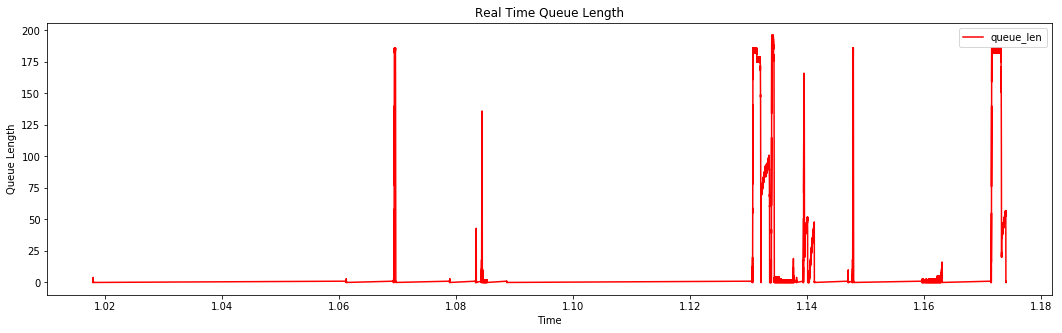

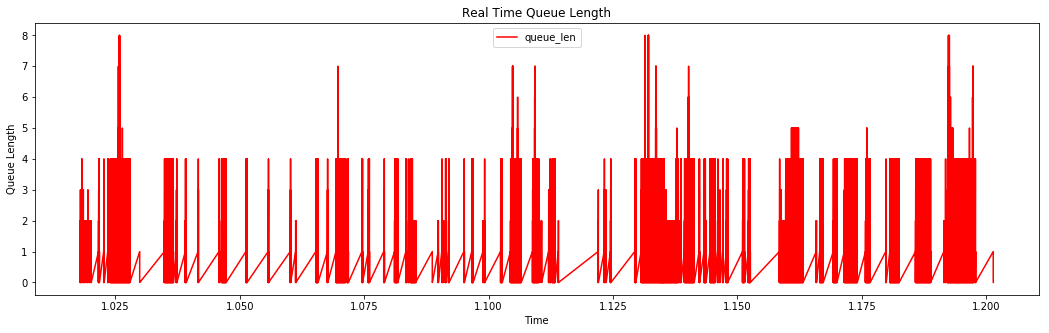

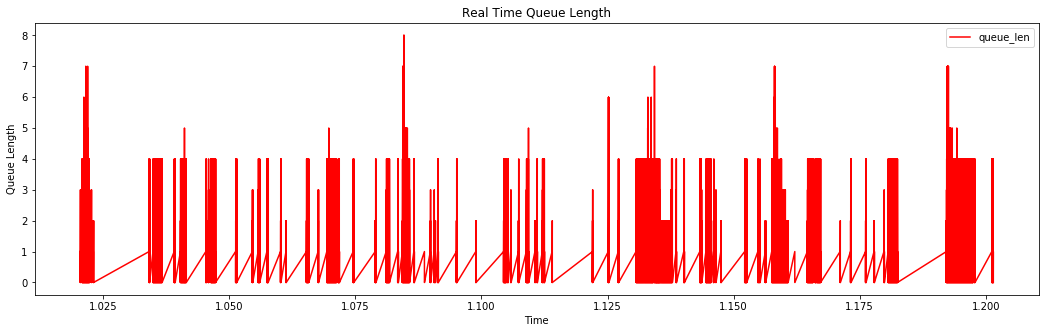

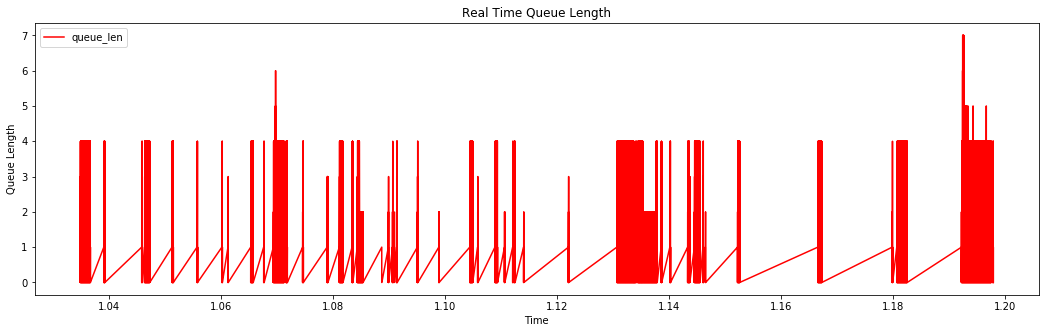

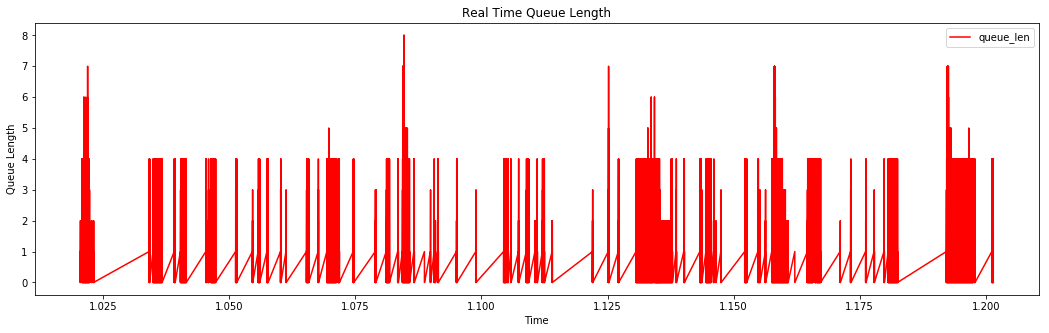

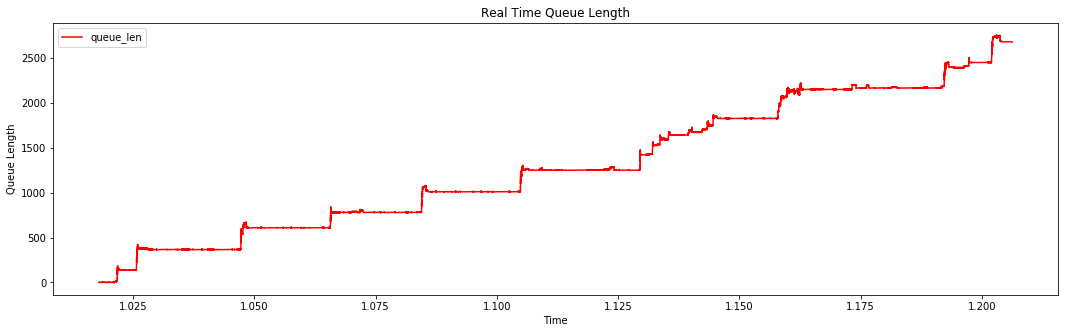

In [37]:
df_out_tr_6 = read_out_tr("/home/pg_ga/lining/Gearbox/automatic/BDP/20200505_8/", \
                              "AFQ10PL_flow_200_0.6_Topology-incast-singlenode-large-number-8.tcl_out.tr")
df = df_out_tr_6
df_out = df.loc[df["pkt_type"].isin(["tcp"])]
df_out = df_out.loc[df_out["fid"].isin([180])]
display(df_out.head(20))
print("from", df_out.from_node.unique())
print("to", df_out.to_node.unique())
for switch in df_out.from_node.unique():
    cal_queue_len(df_out_tr_6, switch)

## HRCCPL

In [38]:
df_out_tr_6 = read_out_tr("/home/pg_ga/lining/Gearbox/automatic/BDP/20200505_8/", \
                              "HRCCPL_flow_200_0.6_Topology-incast-singlenode-large-number-8.tcl_out.tr")
df = df_out_tr_6
df_out = df.loc[df["events"].isin(["r"])]
df_out = df_out.loc[df_out["pkt_type"].isin(["tcp"])]
df_out = df_out.loc[df_out["to_node"].isin([83])]
df_out = df_out[['time', 'pkt_size', 'fid']]
r_event_in_dst = df_out
r_event_in_dst['ts'] = r_event_in_dst['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
grouped=r_event_in_dst.groupby('fid')
shortTh = grouped[['ts', 'pkt_size']].resample(str(12) + 'U', on='ts').sum()
shortTh['throughtput'] = shortTh['pkt_size']*8 / (12 * 1e-6) / 1000 / 1000 / 1000
res = shortTh[['throughtput']]

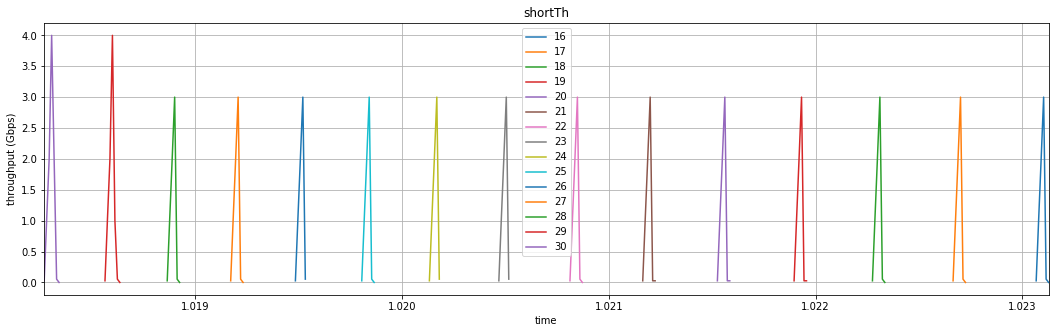

In [39]:
ax=None
cnt = 0
fids=[]
for fid, _ in grouped:
    res_fid = res.loc[fid]
    res_fid['time'] = res_fid.index / timedelta(seconds=1)
    ax=res_fid.plot(x='time', y='throughtput', ax=ax, figsize=(18,5), kind='line', legend=True, title='shortTh', grid=True)
    fids.append(fid)
    cnt += 1
    if cnt == 15:
        break
plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.legend(fids)
plt.show()

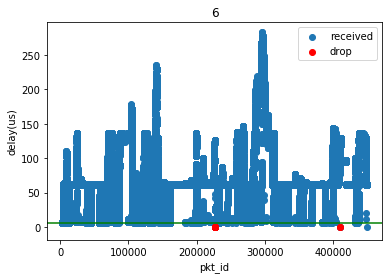

In [40]:
Delay_6 = DelayAnalysis("/home/pg_ga/lining/Gearbox/automatic/BDP/20200505_8/", \
                        "HRCCPL_flow_200_0.6_Topology-incast-singlenode-large-number-8.tcl_out.tr")
Delay_6.print_pkt_delay(12, '6')

,events,time,from_node,to_node,pkt_type,pkt_size,flags,fid,src_addr,dst_addr,seq_num,pkt_id
2135364,+,1.084329,35,13,tcp,40,C--A---,180,35.7,83.92,0,121328
2135365,-,1.084329,35,13,tcp,40,C--A---,180,35.7,83.92,0,121328
2135366,r,1.084330,35,13,tcp,40,C--A---,180,35.7,83.92,0,121328
2135367,+,1.084330,13,0,tcp,40,C--A---,180,35.7,83.92,0,121328
2135368,-,1.084330,13,0,tcp,40,C--A---,180,35.7,83.92,0,121328
2135369,r,1.084331,13,0,tcp,40,C--A---,180,35.7,83.92,0,121328
2135370,+,1.084331,0,8,tcp,40,C--A---,180,35.7,83.92,0,121328
2135371,-,1.084331,0,8,tcp,40,C--A---,180,35.7,83.92,0,121328
2135372,r,1.084332,0,8,tcp,40,C--A---,180,35.7,83.92,0,121328
2135373,+,1.084332,8,6,tcp,40,C--A---,180,35.7,83.92,0,121328


from [35 13  0  8  6 19]
to [13  0  8  6 19 83]


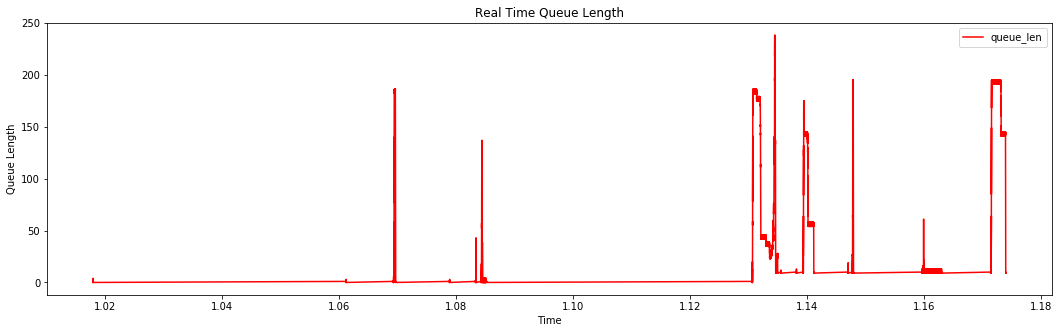

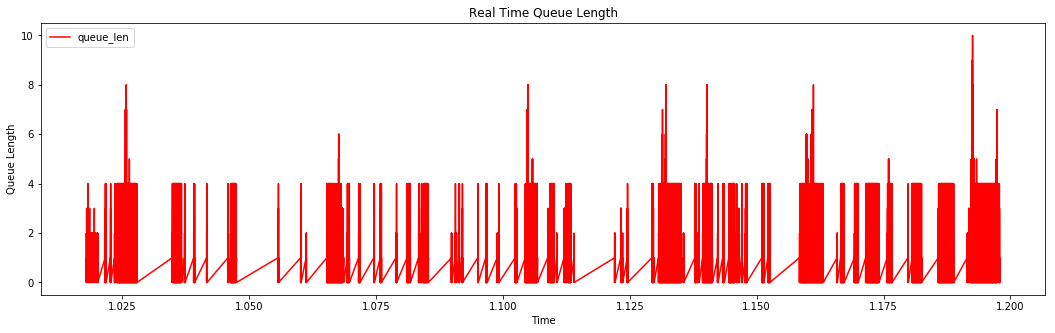

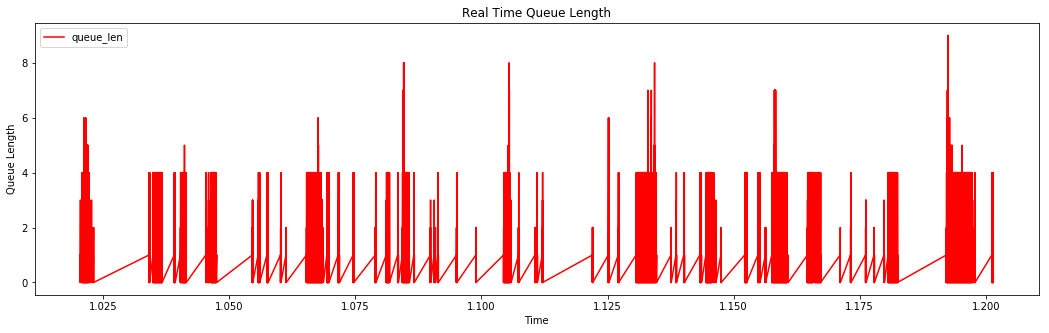

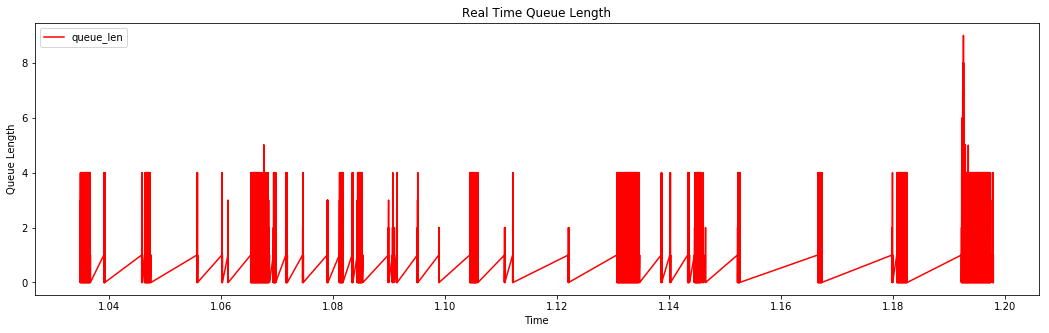

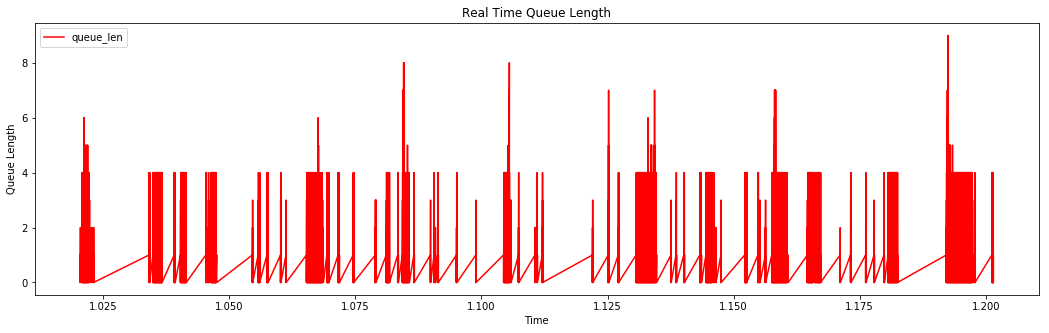

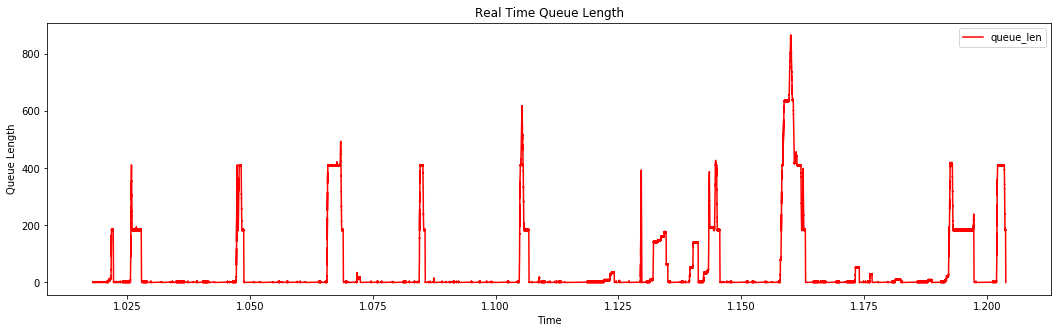

In [43]:
df_out_tr_6 = read_out_tr("/home/pg_ga/lining/Gearbox/automatic/BDP/20200505_8/", \
                              "HRCCPL_flow_200_0.6_Topology-incast-singlenode-large-number-8.tcl_out.tr")
df = df_out_tr_6
df_out = df.loc[df["pkt_type"].isin(["tcp"])]
df_out = df_out.loc[df_out["fid"].isin([180])]
display(df_out.head(20))
print("from", df_out.from_node.unique())
print("to", df_out.to_node.unique())
for switch in df_out.from_node.unique():
    cal_queue_len(df_out_tr_6, switch)

In [ ]:
FCT_analysis_normalize = FCT("/home/pg_ga/lining/Gearbox/automatic/queueSize506/", \
                   "Topology-incast-singlenode-large-number-8.tcl",\
                   200, \
                   [.1, .2, .3, .4, .5, .6, .7, .8, .9, .95], \
                   ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"],\
                   normalize_lists)
FCT_analysis_original = FCT("/home/pg_ga/lining/Gearbox/automatic/queueSize506/", \
                   "Topology-incast-singlenode-large-number-8.tcl",\
                   200, \
                   [.1, .2, .3, .4, .5, .6, .7, .8, .9, .95], \
                   ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"],\
                   original_lists)

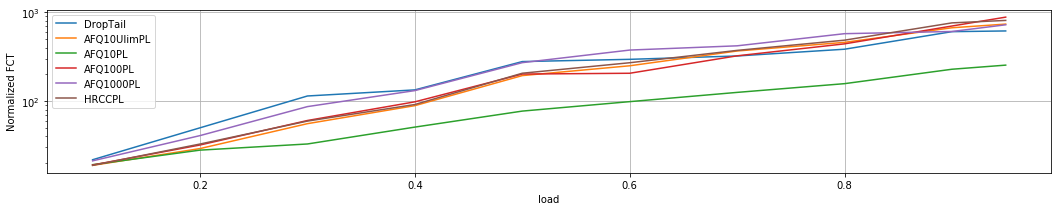

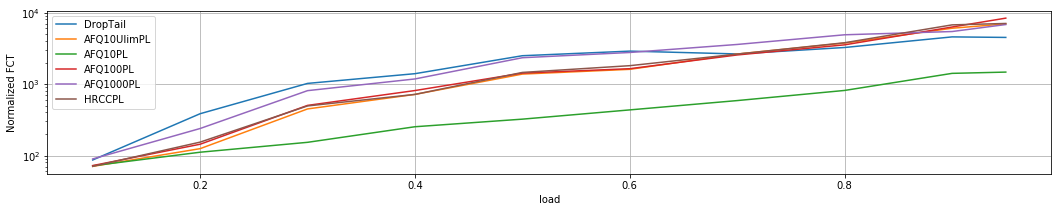

In [22]:
FCT_analysis_normalize.plotting_mean_FCT()
FCT_analysis_original.plotting_mean_FCT()

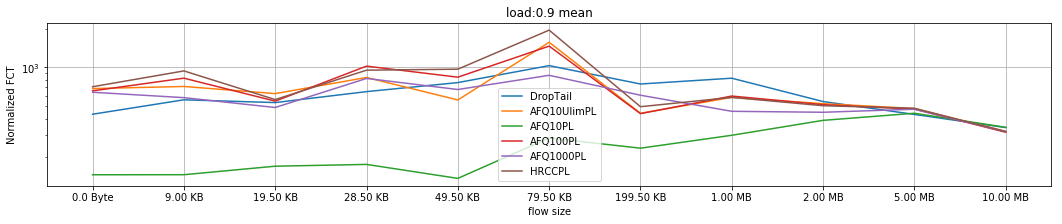

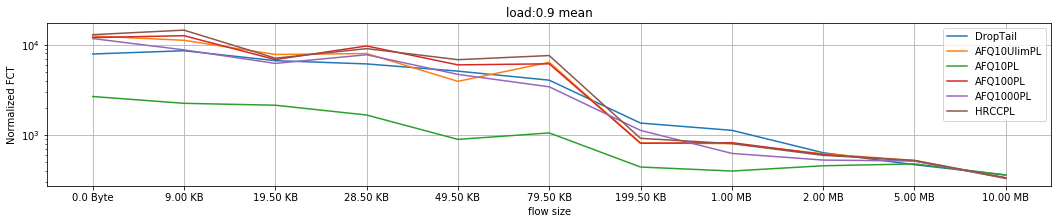

In [23]:
FCT_analysis_normalize.plot_Mean_FCT_fix_load(
    ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"], 0.9, flow_size)

FCT_analysis_original.plot_Mean_FCT_fix_load(
    ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"], 0.9, flow_size)


## AFQ10UlimPL

In [44]:
df_out_tr_6 = read_out_tr("/home/pg_ga/lining/Gearbox/automatic/BDP/20200505_8/", \
                              "AFQ10UlimPL_flow_200_0.6_Topology-incast-singlenode-large-number-8.tcl_out.tr")
df = df_out_tr_6
df_out = df.loc[df["events"].isin(["r"])]
df_out = df_out.loc[df_out["pkt_type"].isin(["tcp"])]
df_out = df_out.loc[df_out["to_node"].isin([83])]
df_out = df_out[['time', 'pkt_size', 'fid']]
r_event_in_dst = df_out
r_event_in_dst['ts'] = r_event_in_dst['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
grouped=r_event_in_dst.groupby('fid')
shortTh = grouped[['ts', 'pkt_size']].resample(str(12) + 'U', on='ts').sum()
shortTh['throughtput'] = shortTh['pkt_size']*8 / (12 * 1e-6) / 1000 / 1000 / 1000
res = shortTh[['throughtput']]

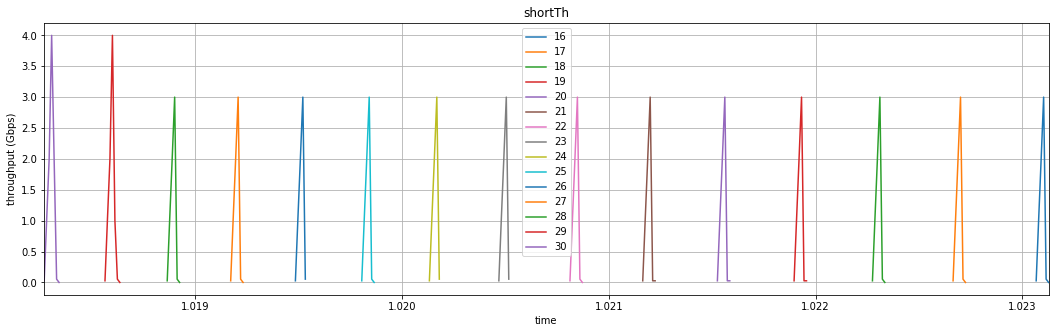

In [45]:
ax=None
cnt = 0
fids=[]
for fid, _ in grouped:
    res_fid = res.loc[fid]
    res_fid['time'] = res_fid.index / timedelta(seconds=1)
    ax=res_fid.plot(x='time', y='throughtput', ax=ax, figsize=(18,5), kind='line', legend=True, title='shortTh', grid=True)
    fids.append(fid)
    cnt += 1
    if cnt == 15:
        break
plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.legend(fids)
plt.show()

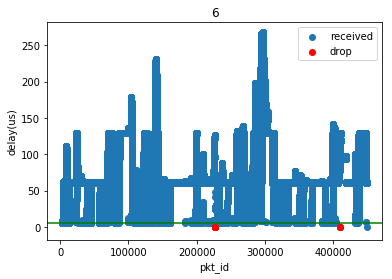

In [46]:
Delay_6 = DelayAnalysis("/home/pg_ga/lining/Gearbox/automatic/BDP/20200505_8/", \
                        "AFQ10UlimPL_flow_200_0.6_Topology-incast-singlenode-large-number-8.tcl_out.tr")
Delay_6.print_pkt_delay(12, '6')

,events,time,from_node,to_node,pkt_type,pkt_size,flags,fid,src_addr,dst_addr,seq_num,pkt_id
2135364,+,1.084329,35,13,tcp,40,C--A---,180,35.7,83.92,0,121328
2135365,-,1.084329,35,13,tcp,40,C--A---,180,35.7,83.92,0,121328
2135366,r,1.084330,35,13,tcp,40,C--A---,180,35.7,83.92,0,121328
2135367,+,1.084330,13,0,tcp,40,C--A---,180,35.7,83.92,0,121328
2135368,-,1.084330,13,0,tcp,40,C--A---,180,35.7,83.92,0,121328
2135369,r,1.084331,13,0,tcp,40,C--A---,180,35.7,83.92,0,121328
2135370,+,1.084331,0,8,tcp,40,C--A---,180,35.7,83.92,0,121328
2135371,-,1.084331,0,8,tcp,40,C--A---,180,35.7,83.92,0,121328
2135372,r,1.084332,0,8,tcp,40,C--A---,180,35.7,83.92,0,121328
2135373,+,1.084332,8,6,tcp,40,C--A---,180,35.7,83.92,0,121328


from [35 13  0  8  6 19]
to [13  0  8  6 19 83]


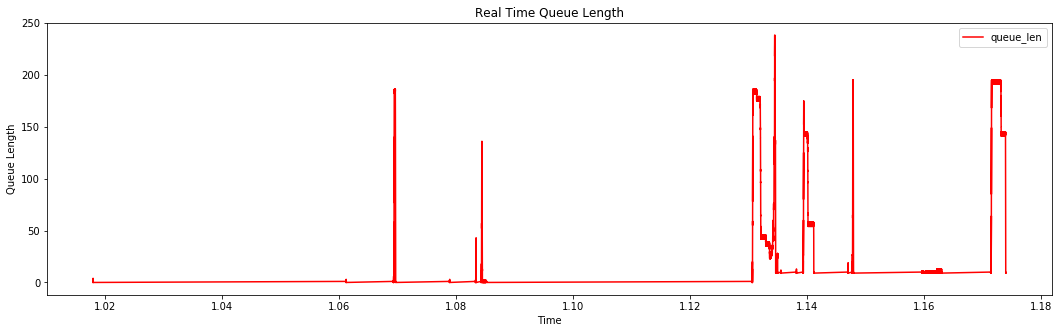

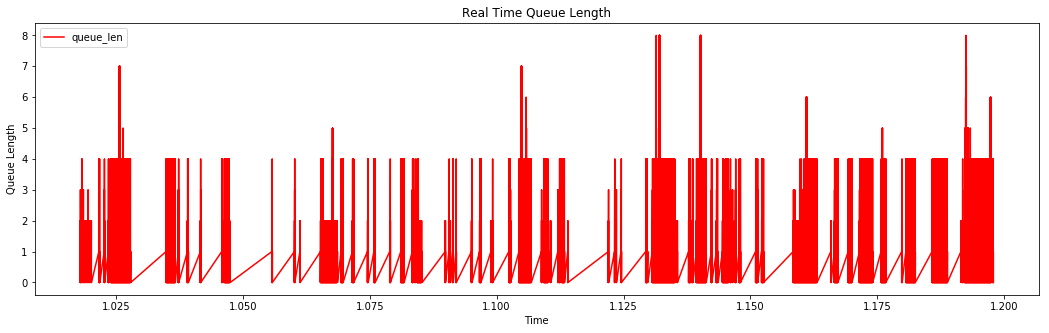

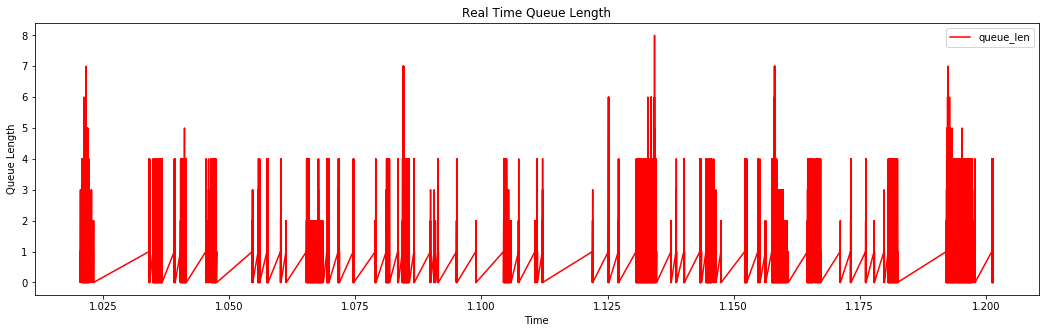

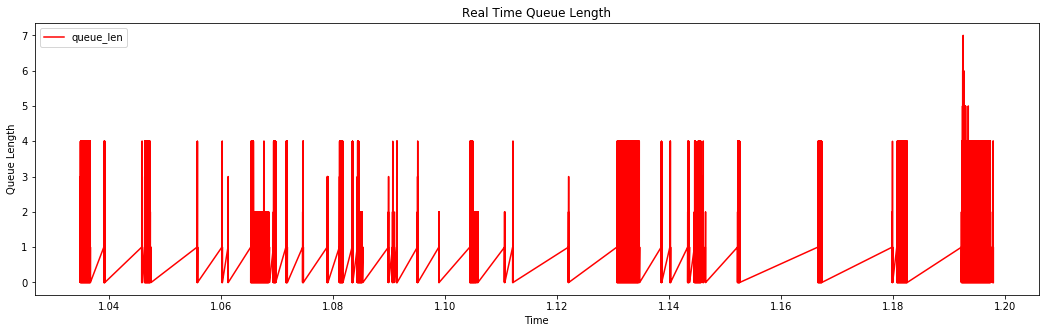

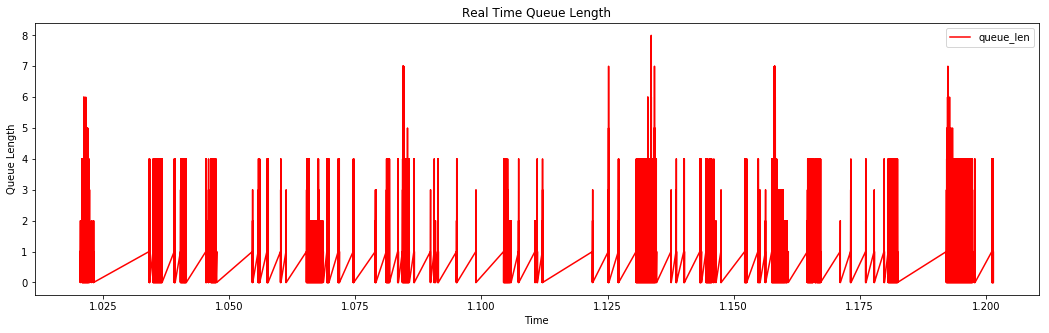

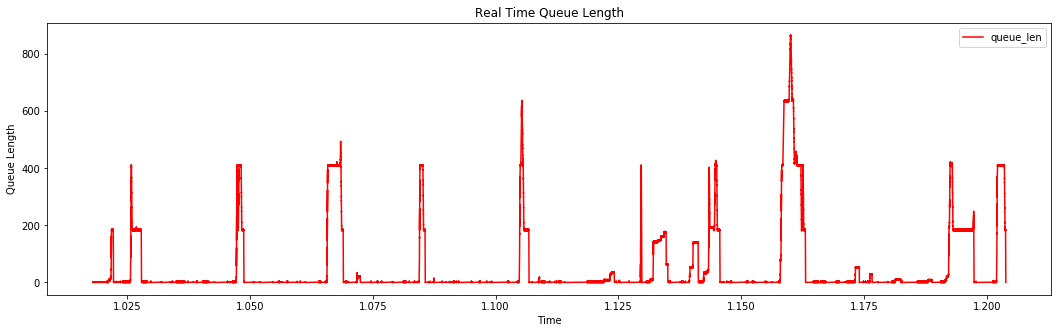

In [47]:
df_out_tr_6 = read_out_tr("/home/pg_ga/lining/Gearbox/automatic/BDP/20200505_8/", \
                              "AFQ10UlimPL_flow_200_0.6_Topology-incast-singlenode-large-number-8.tcl_out.tr")
df = df_out_tr_6
df_out = df.loc[df["pkt_type"].isin(["tcp"])]
df_out = df_out.loc[df_out["fid"].isin([180])]
display(df_out.head(20))
print("from", df_out.from_node.unique())
print("to", df_out.to_node.unique())
for switch in df_out.from_node.unique():
    cal_queue_len(df_out_tr_6, switch)

## AFQ100

In [48]:
df_out_tr_6 = read_out_tr("/home/pg_ga/lining/Gearbox/automatic/BDP/20200505_8/", \
                              "AFQ100PL_flow_200_0.6_Topology-incast-singlenode-large-number-8.tcl_out.tr")
df = df_out_tr_6
df_out = df.loc[df["events"].isin(["r"])]
df_out = df_out.loc[df_out["pkt_type"].isin(["tcp"])]
df_out = df_out.loc[df_out["to_node"].isin([83])]
df_out = df_out[['time', 'pkt_size', 'fid']]
r_event_in_dst = df_out
r_event_in_dst['ts'] = r_event_in_dst['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
grouped=r_event_in_dst.groupby('fid')
shortTh = grouped[['ts', 'pkt_size']].resample(str(12) + 'U', on='ts').sum()
shortTh['throughtput'] = shortTh['pkt_size']*8 / (12 * 1e-6) / 1000 / 1000 / 1000
res = shortTh[['throughtput']]

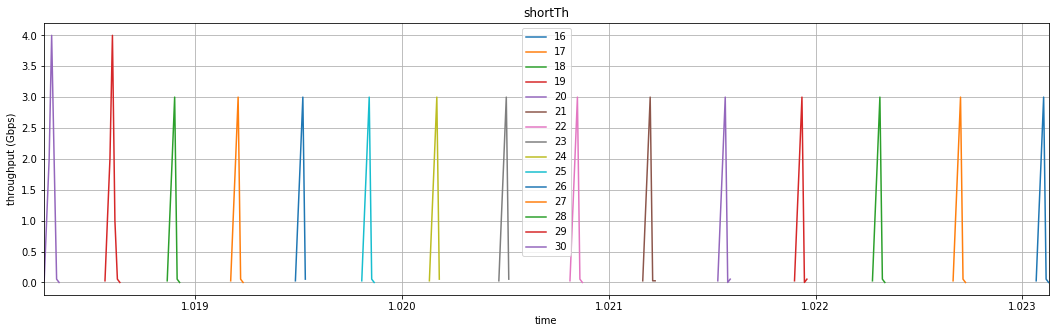

In [49]:
ax=None
cnt = 0
fids=[]
for fid, _ in grouped:
    res_fid = res.loc[fid]
    res_fid['time'] = res_fid.index / timedelta(seconds=1)
    ax=res_fid.plot(x='time', y='throughtput', ax=ax, figsize=(18,5), kind='line', legend=True, title='shortTh', grid=True)
    fids.append(fid)
    cnt += 1
    if cnt == 15:
        break
plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.legend(fids)
plt.show()

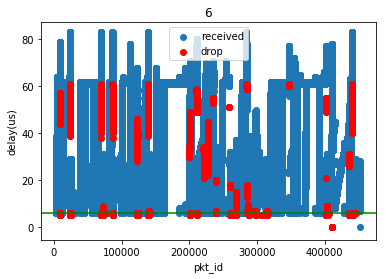

In [50]:
Delay_6 = DelayAnalysis("/home/pg_ga/lining/Gearbox/automatic/BDP/20200505_8/", \
                        "AFQ10PL_flow_200_0.6_Topology-incast-singlenode-large-number-8.tcl_out.tr")
Delay_6.print_pkt_delay(12, '6')

,events,time,from_node,to_node,pkt_type,pkt_size,flags,fid,src_addr,dst_addr,seq_num,pkt_id
2156815,+,1.084329,35,13,tcp,40,C--A---,180,35.7,83.92,0,122563
2156816,-,1.084329,35,13,tcp,40,C--A---,180,35.7,83.92,0,122563
2156817,r,1.084330,35,13,tcp,40,C--A---,180,35.7,83.92,0,122563
2156818,+,1.084330,13,0,tcp,40,C--A---,180,35.7,83.92,0,122563
2156819,-,1.084330,13,0,tcp,40,C--A---,180,35.7,83.92,0,122563
2156820,r,1.084331,13,0,tcp,40,C--A---,180,35.7,83.92,0,122563
2156821,+,1.084331,0,8,tcp,40,C--A---,180,35.7,83.92,0,122563
2156822,-,1.084331,0,8,tcp,40,C--A---,180,35.7,83.92,0,122563
2156823,r,1.084332,0,8,tcp,40,C--A---,180,35.7,83.92,0,122563
2156824,+,1.084332,8,6,tcp,40,C--A---,180,35.7,83.92,0,122563


from [35 13  0  8  6 19]
to [13  0  8  6 19 83]


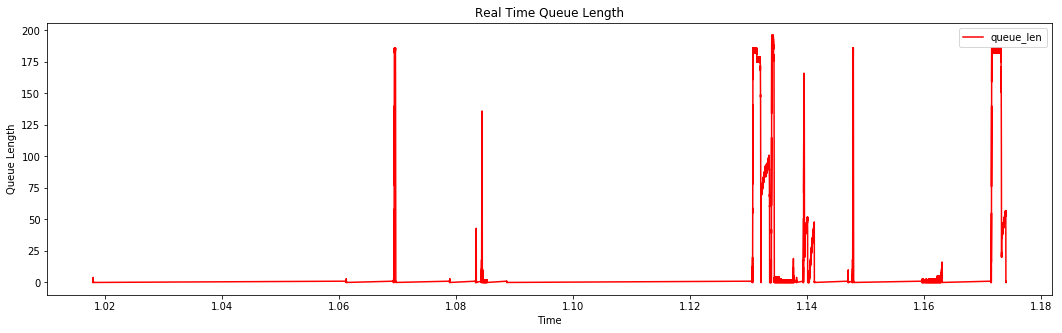

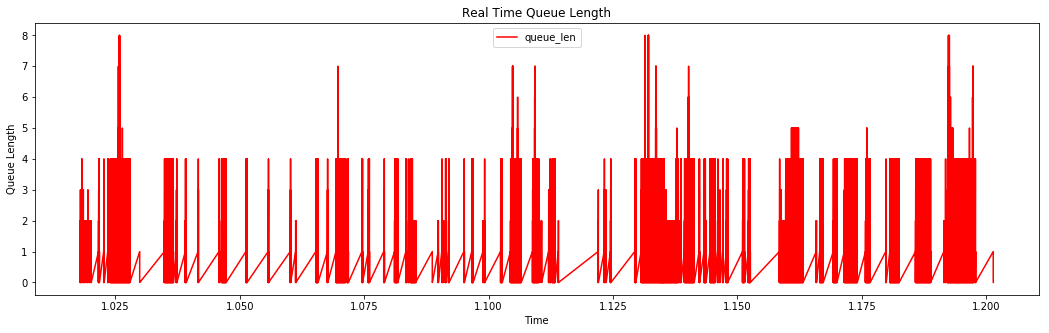

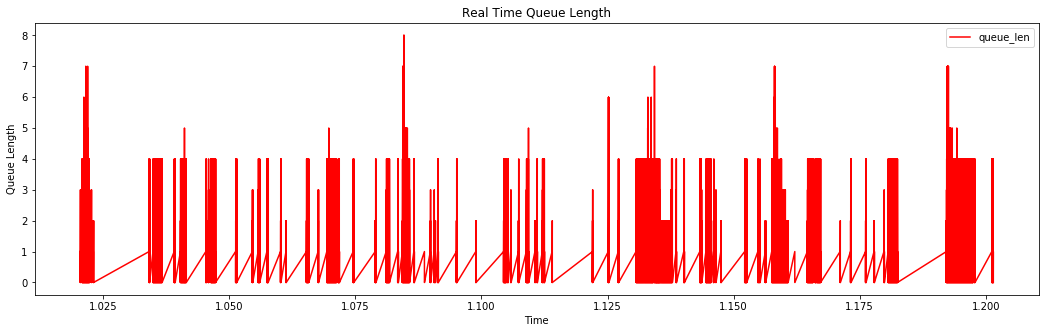

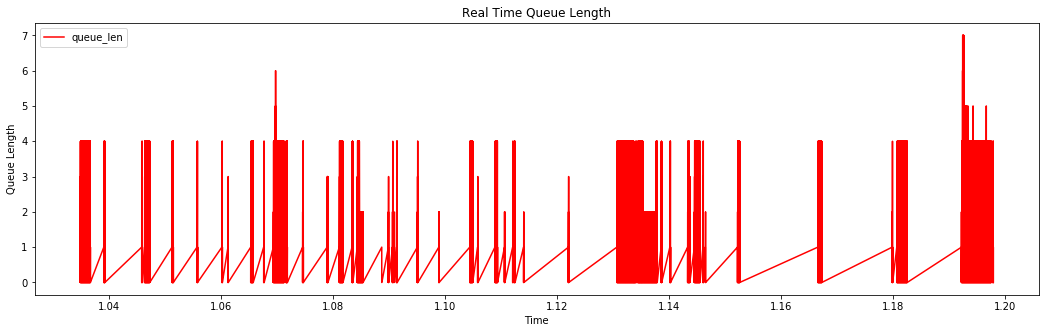

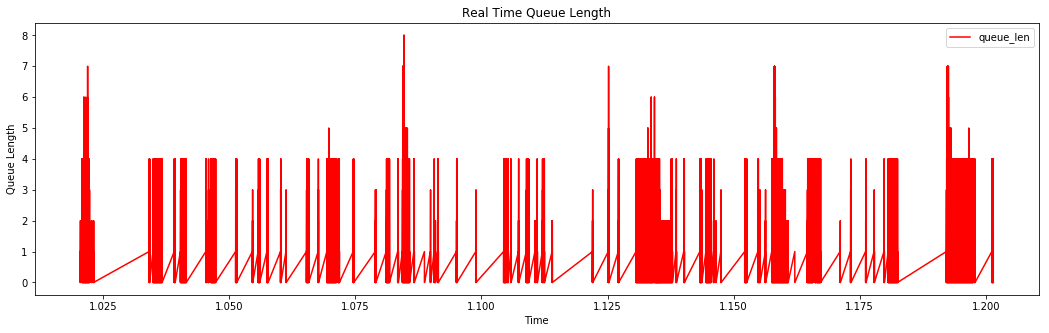

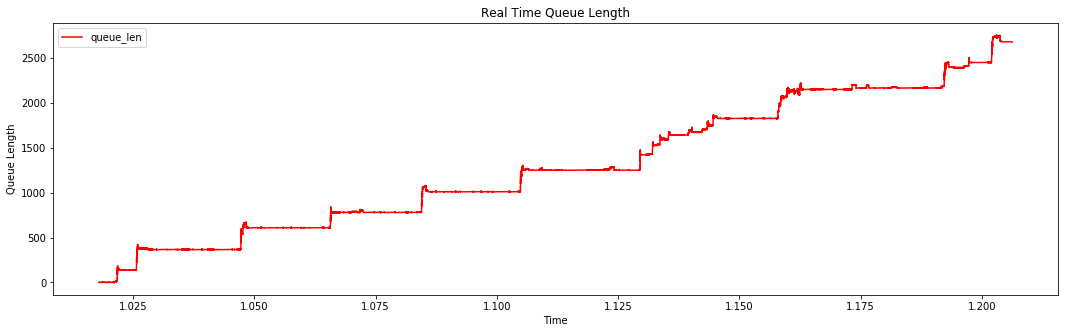

In [51]:
df_out_tr_6 = read_out_tr("/home/pg_ga/lining/Gearbox/automatic/BDP/20200505_8/", \
                              "AFQ10PL_flow_200_0.6_Topology-incast-singlenode-large-number-8.tcl_out.tr")
df = df_out_tr_6
df_out = df.loc[df["pkt_type"].isin(["tcp"])]
df_out = df_out.loc[df_out["fid"].isin([180])]
display(df_out.head(20))
print("from", df_out.from_node.unique())
print("to", df_out.to_node.unique())
for switch in df_out.from_node.unique():
    cal_queue_len(df_out_tr_6, switch)

## AFQ1000

In [52]:
df_out_tr_6 = read_out_tr("/home/pg_ga/lining/Gearbox/automatic/BDP/20200505_8/", \
                              "AFQ100PL_flow_200_0.6_Topology-incast-singlenode-large-number-8.tcl_out.tr")
df = df_out_tr_6
df_out = df.loc[df["events"].isin(["r"])]
df_out = df_out.loc[df_out["pkt_type"].isin(["tcp"])]
df_out = df_out.loc[df_out["to_node"].isin([83])]
df_out = df_out[['time', 'pkt_size', 'fid']]
r_event_in_dst = df_out
r_event_in_dst['ts'] = r_event_in_dst['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
grouped=r_event_in_dst.groupby('fid')
shortTh = grouped[['ts', 'pkt_size']].resample(str(12) + 'U', on='ts').sum()
shortTh['throughtput'] = shortTh['pkt_size']*8 / (12 * 1e-6) / 1000 / 1000 / 1000
res = shortTh[['throughtput']]

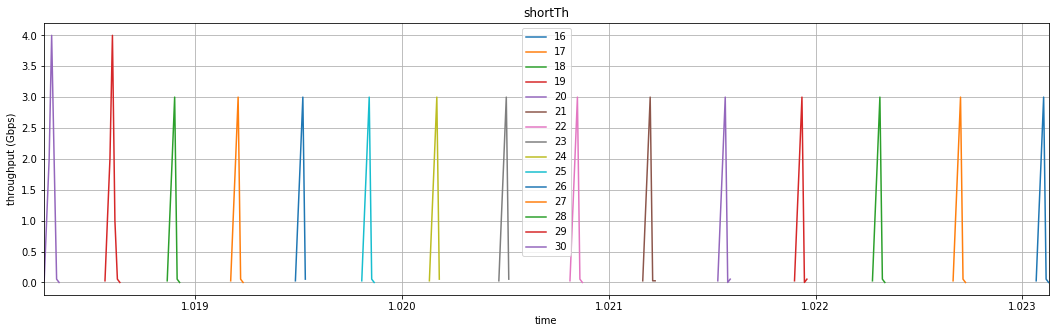

In [53]:
ax=None
cnt = 0
fids=[]
for fid, _ in grouped:
    res_fid = res.loc[fid]
    res_fid['time'] = res_fid.index / timedelta(seconds=1)
    ax=res_fid.plot(x='time', y='throughtput', ax=ax, figsize=(18,5), kind='line', legend=True, title='shortTh', grid=True)
    fids.append(fid)
    cnt += 1
    if cnt == 15:
        break
plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.legend(fids)
plt.show()

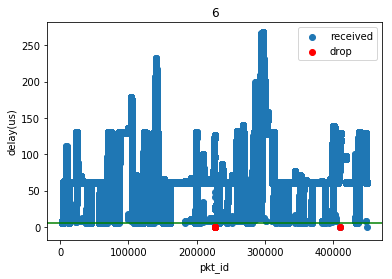

In [54]:
Delay_6 = DelayAnalysis("/home/pg_ga/lining/Gearbox/automatic/BDP/20200505_8/", \
                        "AFQ100PL_flow_200_0.6_Topology-incast-singlenode-large-number-8.tcl_out.tr")
Delay_6.print_pkt_delay(12, '6')

,events,time,from_node,to_node,pkt_type,pkt_size,flags,fid,src_addr,dst_addr,seq_num,pkt_id
2135364,+,1.084329,35,13,tcp,40,C--A---,180,35.7,83.92,0,121328
2135365,-,1.084329,35,13,tcp,40,C--A---,180,35.7,83.92,0,121328
2135366,r,1.084330,35,13,tcp,40,C--A---,180,35.7,83.92,0,121328
2135367,+,1.084330,13,0,tcp,40,C--A---,180,35.7,83.92,0,121328
2135368,-,1.084330,13,0,tcp,40,C--A---,180,35.7,83.92,0,121328
2135369,r,1.084331,13,0,tcp,40,C--A---,180,35.7,83.92,0,121328
2135370,+,1.084331,0,8,tcp,40,C--A---,180,35.7,83.92,0,121328
2135371,-,1.084331,0,8,tcp,40,C--A---,180,35.7,83.92,0,121328
2135372,r,1.084332,0,8,tcp,40,C--A---,180,35.7,83.92,0,121328
2135373,+,1.084332,8,6,tcp,40,C--A---,180,35.7,83.92,0,121328


from [35 13  0  8  6 19]
to [13  0  8  6 19 83]


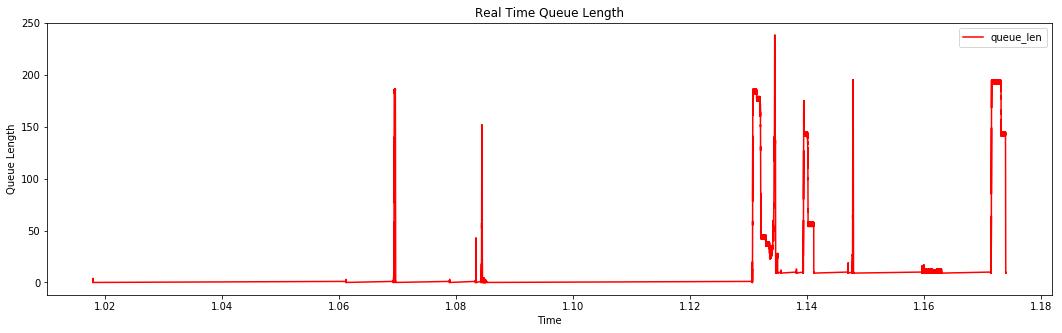

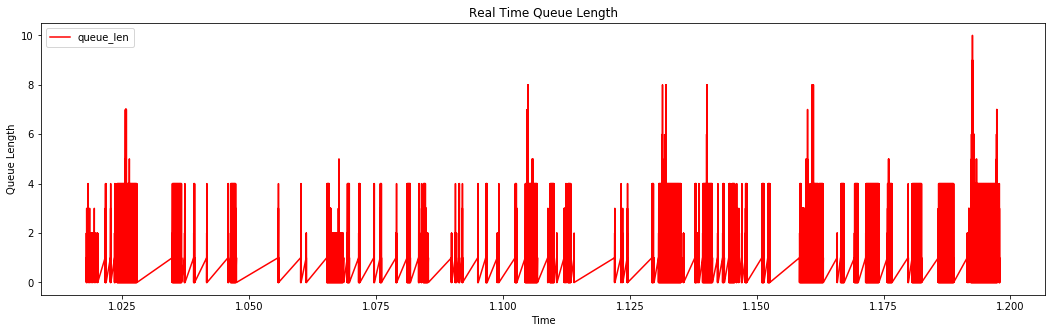

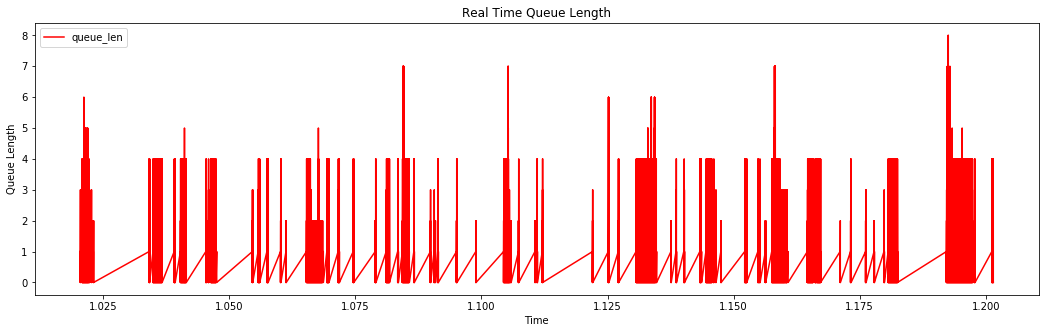

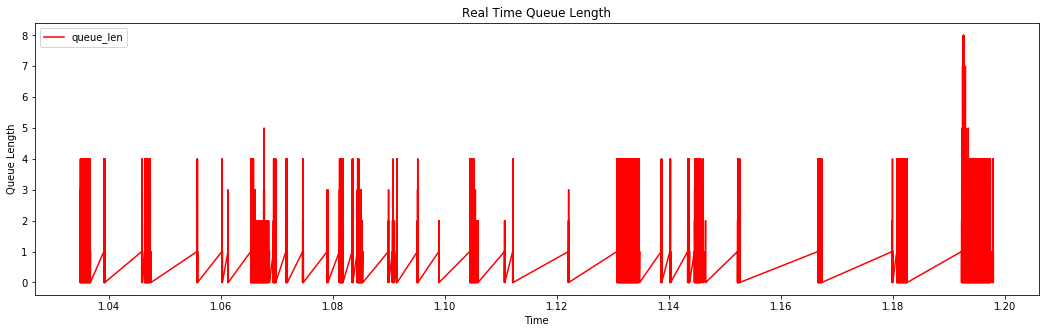

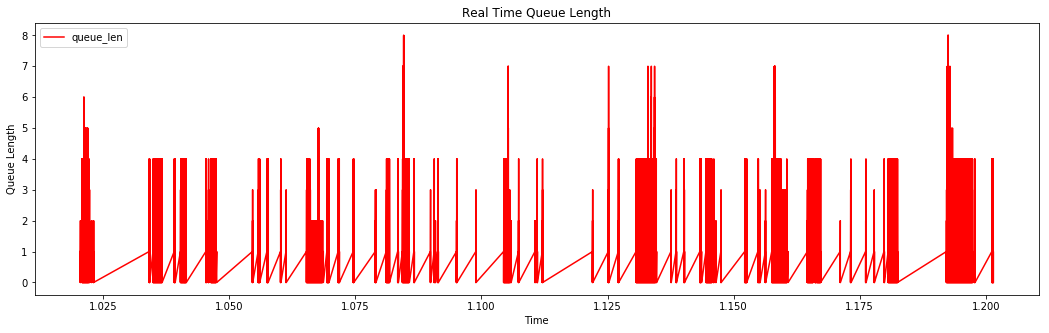

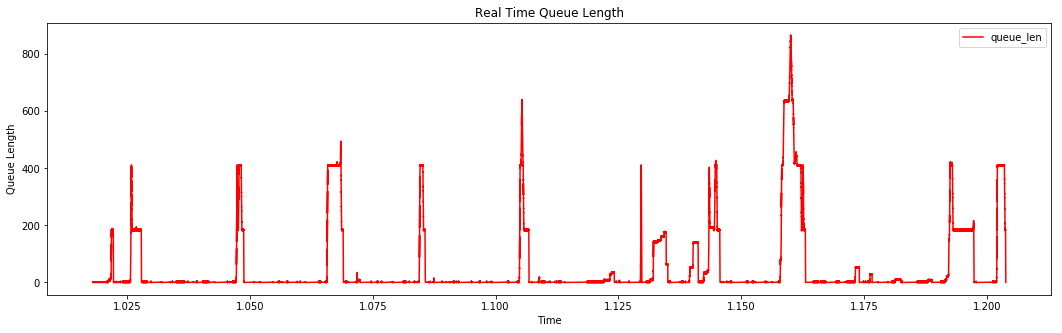

In [55]:
df_out_tr_6 = read_out_tr("/home/pg_ga/lining/Gearbox/automatic/BDP/20200505_8/", \
                              "AFQ100PL_flow_200_0.6_Topology-incast-singlenode-large-number-8.tcl_out.tr")
df = df_out_tr_6
df_out = df.loc[df["pkt_type"].isin(["tcp"])]
df_out = df_out.loc[df_out["fid"].isin([180])]
display(df_out.head(20))
print("from", df_out.from_node.unique())
print("to", df_out.to_node.unique())
for switch in df_out.from_node.unique():
    cal_queue_len(df_out_tr_6, switch)